## Task 1

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def gaussElim(a, b):
    n = len(b)
    for k in range(0, n-1):
        for i in range(k+1, n):
            if a[i, k] != 0.0:
                lam = a[i, k] / a[k, k]
                a[i, k+1:n] = a[i, k+1:n] - lam*a[k, k+1:n]
                b[i] = b[i] - lam*b[k]
    for k in range(n-1, -1, -1):
        b[k] = (b[k] - np.dot(a[k, k+1:n], b[k+1:n]))/a[k, k]

    return b

In [7]:
def system_solution(x_start, eps=1e-4):
    x = x_start[0]  # count step s = 1
    y = x_start[1]
    z = x_start[2]

    matrix = np.array(
        [
            [2 * x, 2 * y, 2 * z],
            [4 * x, 2 * y, -4],
            [6 * x, -4, 2 * z]
        ]
    )

    b = np.array(
        [
            1 - (x ** 2 + y ** 2 + z ** 2),
            4 * z - y ** 2 - 2 * x ** 2,
            4 * y - 3 * x ** 2 - z ** 2
        ]
    )

    delt_x, delt_y, delt_z = gaussElim(matrix, b)

    cur_x = x + delt_x  # values on s step
    cur_y = y + delt_y
    cur_z = z + delt_z

    x = cur_x
    y = cur_y
    z = cur_z

    while (abs(max([delt_x / cur_x, delt_y / cur_y, delt_z / cur_z])) >= eps):
        matrix = np.array([
            [2 * x, 2 * y, 2 * z],
            [4 * x, 2 * y, -4],
            [6 * x, -4, 2 * z]
        ])

        b = np.array([
            1 - (x ** 2 + y ** 2 + z ** 2),
            4 * z - y ** 2 - 2 * x ** 2,
            4 * y - 3 * x ** 2 - z ** 2
        ])

        delt_x, delt_y, delt_z = gaussElim(matrix, b)

        cur_x = x + delt_x
        cur_y = y + delt_y
        cur_z = z + delt_z

        x = cur_x
        y = cur_y
        z = cur_z

    return (cur_x, cur_y, cur_z)

In [8]:
print("Решения системы: ")
print("Корень №1: ", tuple(
    map(lambda x: round(x, 6), system_solution(x_start=[+1, 0.1, 0.1]))))
print("Корень №2: ", tuple(
    map(lambda x: round(x, 6), system_solution(x_start=[-1, 0.1, 0.1]))))

Решения системы: 
Корень №1:  (0.785197, 0.496611, 0.369923)
Корень №2:  (-0.785197, 0.496611, 0.369923)


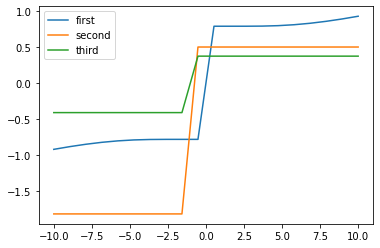

In [26]:
x_init = np.linspace(-10, 10, 20)
plt.plot(x_init, [system_solution(x_start=[x, 0.1, 0.1])[0] for x in x_init], label='first')
plt.plot(x_init, [system_solution(x_start=[-1, x, 0.1])[1] for x in x_init], label='second')
plt.plot(x_init, [system_solution(x_start=[-1, 0.1, x])[2] for x in x_init], label='third')
plt.legend()

## Task 2

In [18]:
def func(x):
    return 2 / np.sqrt(2 * np.pi) * np.exp(-x ** 2 / 2)


def count_integral(x, n=100):
    N = 2 * n
    steps = [x / N * i for i in range(N + 1)]

    h = x / N

    s1 = 2 * np.sum([func(steps[2 * j]) for j in range(1, N // 2)])
    s2 = 4 * np.sum([func(steps[2 * j - 1]) for j in range(1, N // 2 + 1)])

    return h / 3 * (func(steps[0]) + s1 + s2 + func(steps[N]))

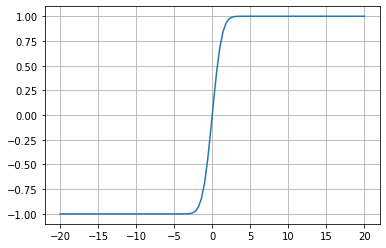

In [19]:
x = np.linspace(-20, 20, 100)
y = [count_integral(i) for i in x]

plt.plot(x, y)
plt.grid(True)
plt.show()

In [20]:
def find_root(fx, eps=1e-6):
    # bisection
    # 0 - fx

    def f(x):
        return fx - count_integral(x)

    left_bound = -5
    right_bound = 5

    if f(left_bound) == 0:
        return left_bound

    if f(right_bound) == 0:
        return right_bound

    if f(right_bound) < f(left_bound):
        left_bound, right_bound = right_bound, left_bound

    delt = right_bound - left_bound

    x = left_bound + (right_bound - left_bound) / 2

    while abs((right_bound - left_bound) / (x * (right_bound - left_bound) + eps)) > eps:
        dx = (right_bound - left_bound) / 2

        x = left_bound + dx
        if (np.sign(f(left_bound)) != np.sign(f(x))):
            right_bound = x
        else:
            left_bound = x

    return x

print("Значение функции: ", find_root(0.5))

Значение функции:  0.6744903326034546


## Task 3

In [21]:
def der_equation_solution(n=100):
    # y'' = x ^ 2 + y ^ 3
    # 0 <= x <= 1
    # y(0) = 1
    # y(1) = 3

    def f(x):  # init func
        return 2 * x + 1

    # Решим методом прогонки
    h = 1 / n
    omega = [0 + i * h for i in range(n + 1)]

    y = [f(x) for x in omega]
    N = len(omega)

    for _ in range(N):
        ksi = [0 for _ in range(N - 1)]
        et = [0 for _ in range(N - 1)]

        for i in range(1, len(ksi)):
            A = 1
            C = 1

            B = A + C + 3 * h ** 2 * y[i]

            F = y[i - 1] - 2 * y[i] + y[i + 1] - \
                h**2*(omega[i] ** 2 + y[i] ** 3)

            ksi[i] = C / (B - A * ksi[i - 1])
            et[i] = (A * et[i - 1] + F) / (B - A * ksi[i - 1])

        delta_y = [0 for _ in range(N)]
        for i in range(len(ksi) - 1, 0, -1):
            delta_y[i] = ksi[i] * delta_y[i + 1] + et[i]

        for i in range(len(y)):
            y[i] = y[i] + delta_y[i]

    plt.plot(omega, y, label="Init")
    plt.plot(omega, [f(x) for x in omega], label="Ans")
    plt.grid(True)
    plt.legend()
    plt.show()